<a href="https://colab.research.google.com/github/AdriBoui/Notebooks/blob/main/Challenge_1_Python_basics_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Data Analysis and Manipulation with Pandas
In this exercise, we will be working with two datasets: sales data and customer data. We will use pandas to perform various data analysis and manipulation tasks.

test

### Part 1: Loading Data
1. Load the sales data using pandas read_csv function and assign it to a variable called sales_data.
2. Load the customer data using pandas read_csv function and assign it to a variable called customer_data.

**Note: Both CSV files are located in the same directory as this Jupyter notebook.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/le_wagon/csv_files/sales_data.csv')

In [ ]:
customer_data = pd.read_csv('/content/drive/MyDrive/le_wagon/csv_files/customer_data.csv')

### Part 2: Data Exploration
In this exercise, we will explore the two datasets that we loaded in Part 1.

- Check the shape of both dataframes. How many rows and columns do they have?

In [ ]:
display(sales_data.shape, customer_data.head())

(30, 6)

,Unnamed: 0,name,state,salesperson,customer_id
0,0,Jeremie,CA,Alice,1
1,1,Mathilde,NY,Bob,2
2,2,Pierre,TX,Charlie,3


- Print the first 5 rows of both datasets.

- Use the describe method to generate basic summary statistics for the sales_data DataFrame.


In [ ]:
print(sales_data.describe())

       Unnamed: 0  units_sold  sales_amount
count   30.000000   30.000000     30.000000
mean    14.500000    4.900000     64.133333
std      8.803408    2.591099     25.335995
min      0.000000    1.000000     20.000000
25%      7.250000    3.000000     41.000000
50%     14.500000    4.500000     67.000000
75%     21.750000    7.000000     86.500000
max     29.000000    9.000000     99.000000


- Use the groupby method to calculate the total sales amount and total units sold for each salesperson in the sales_data DataFrame.

In [ ]:
total_sales_amount1 = sales_data.groupby('salesperson')['sales_amount'].sum()
total_sales_amount1

,sales_amount
salesperson,
Alice,399
Bob,738
Charlie,787


- Use the groupby method to calculate the total sales amount and total units sold for each product in the sales_data DataFrame.

In [ ]:
total_sales_amount2 = sales_data.groupby('product')['sales_amount'].sum()
total_sales_amount2

,sales_amount
product,
A,656
B,828
C,440


- Use the merge method to merge the sales_data and customer_data DataFrames on the salesperson column. How many rows and columns does the resulting DataFrame have?

In [ ]:
merged_data = pd.merge(sales_data, customer_data, on='salesperson')
merged_data = merged_data.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"])
merged_data

,date,product,salesperson,units_sold,sales_amount,name,state,customer_id
0,2022-01-01,B,Bob,7,27,Mathilde,NY,2
1,2022-01-02,A,Alice,1,41,Jeremie,CA,1
2,2022-01-03,B,Alice,8,33,Jeremie,CA,1
3,2022-01-04,C,Charlie,6,80,Pierre,TX,3
4,2022-01-05,B,Bob,2,38,Mathilde,NY,2
5,2022-01-06,A,Bob,9,93,Mathilde,NY,2
6,2022-01-07,A,Charlie,3,32,Pierre,TX,3
7,2022-01-08,C,Alice,4,32,Jeremie,CA,1
8,2022-01-09,B,Bob,9,20,Mathilde,NY,2
9,2022-01-10,B,Bob,5,63,Mathilde,NY,2


- Use the groupby method to calculate the total sales amount and total units sold for each customer in the merged DataFrame.

In [ ]:
total_sales_amount3 = merged_data.groupby('customer_id')['sales_amount'].sum()
total_sales_amount3

,sales_amount
customer_id,
1,399
2,738
3,787


### Part 3: Data Cleaning
In this exercise, we will clean the sales_data dataframe.

- Identify any missing values in the sales_data DataFrame. If there are any, fill them in with appropriate values.

In [ ]:
sales_data.isna().sum()

,0
Unnamed: 0,0
date,0
product,0
salesperson,0
units_sold,0
sales_amount,0


- Identify and remove any duplicates in the sales_data DataFrame.

In [ ]:
sales_data.duplicated().sum()

0

- Identify any missing values in the customer_data DataFrame. If there are any, fill them in with appropriate values.

In [ ]:
customer_data.isna().sum()

,0
Unnamed: 0,0
name,0
state,0
salesperson,0
customer_id,0


- Identify and remove any duplicates in the customer_data DataFrame.

In [ ]:
customer_data.duplicated().sum()

0

### Part 4: Data Transformation

- Create a new column in the sales_data DataFrame called total_sales that is the product of the units_sold and sales_amount columns.

In [ ]:
sales_data['total_sales'] = sales_data['units_sold'] * sales_data['sales_amount']
sales_data

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount,total_sales
0,0,2022-01-01,B,Bob,7,27,189
1,1,2022-01-02,A,Alice,1,41,41
2,2,2022-01-03,B,Alice,8,33,264
3,3,2022-01-04,C,Charlie,6,80,480
4,4,2022-01-05,B,Bob,2,38,76
5,5,2022-01-06,A,Bob,9,93,837
6,6,2022-01-07,A,Charlie,3,32,96
7,7,2022-01-08,C,Alice,4,32,128
8,8,2022-01-09,B,Bob,9,20,180
9,9,2022-01-10,B,Bob,5,63,315


- Create a new column in the sales_data DataFrame called year that is the year of the date column.

In [ ]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data["year"] = sales_data["date"].dt.year
sales_data

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount,total_sales,year
0,0,2022-01-01,B,Bob,7,27,189,2022
1,1,2022-01-02,A,Alice,1,41,41,2022
2,2,2022-01-03,B,Alice,8,33,264,2022
3,3,2022-01-04,C,Charlie,6,80,480,2022
4,4,2022-01-05,B,Bob,2,38,76,2022
5,5,2022-01-06,A,Bob,9,93,837,2022
6,6,2022-01-07,A,Charlie,3,32,96,2022
7,7,2022-01-08,C,Alice,4,32,128,2022
8,8,2022-01-09,B,Bob,9,20,180,2022
9,9,2022-01-10,B,Bob,5,63,315,2022


- Create a new DataFrame called sales_by_state that shows the total sales amount and total units sold for each state in the customer_data DataFrame.

In [ ]:
sales_by_state = merged_data.groupby('state')['sales_amount'].sum()
sales_by_state

,sales_amount
state,
CA,399
NY,738
TX,787


- Create a new DataFrame called sales_by_month that shows the total sales amount and total units sold for each month in the sales_data DataFrame.

In [ ]:
sales_data["month"] = sales_data["date"].dt.month

In [ ]:
sales_by_month = sales_data.groupby('month')['sales_amount'].sum()
sales_by_month

,sales_amount
month,
1,1924


### Part 5: Data Visualization

- Use the plot method to create a bar chart showing the total sales amount for each salesperson in the sales_data DataFrame.

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='salesperson'>

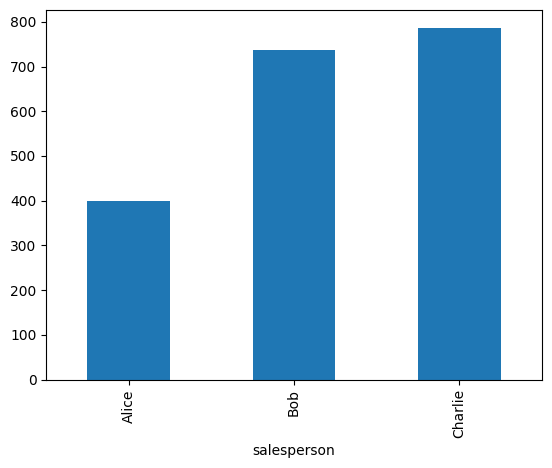

In [ ]:
total_sales_amount = sales_data.groupby('salesperson')['sales_amount'].sum()
total_sales_amount.plot(kind='bar')

- Use the plot method to create a bar chart showing the total sales amount for each product in the sales_data DataFrame.

<Axes: xlabel='product'>

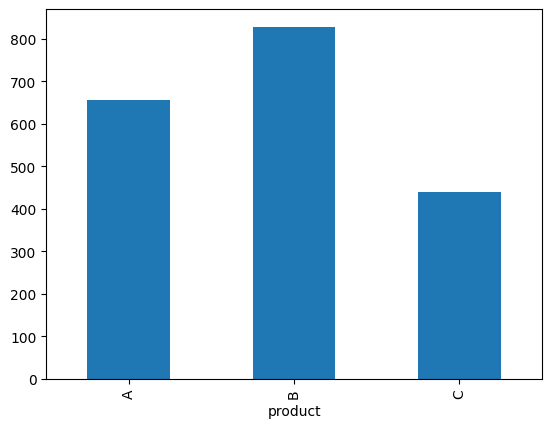

In [ ]:
total_sales_amount2.plot(kind='bar')

- Use the plot method to create a bar chart showing the total sales amount for each state in the customer_data DataFrame.

<Axes: xlabel='state'>

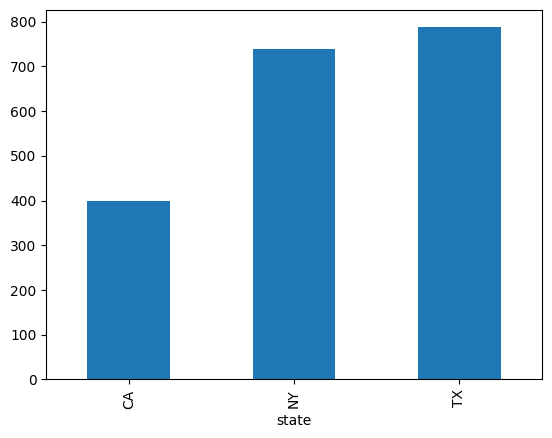

In [ ]:
sales_by_state.plot(kind='bar')